# Nevral stiloverføring utforksende notebooks

Ser på demobilder lagt ved i pystiche

In [1]:
!pip install pystiche
import pystiche
from pystiche import demo, loss, enc, optim
from pystiche.image import show_image, write_image
from pystiche.misc import get_device, get_input_image

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.3/67.3 KB 640.0 kB/s eta 0:00:00


In [2]:
from PIL import Image

In [3]:
images = demo.images()
images.download()
size = 500
device = get_device()

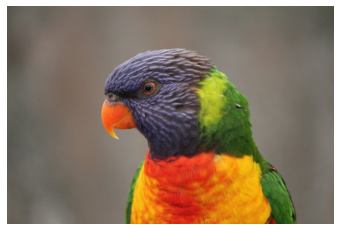

In [4]:
image_bird = images["bird1"].read(size=size, device=device)
image_mosaic = images["mosaic"].read(size=size, device=device)
show_image(image_bird)

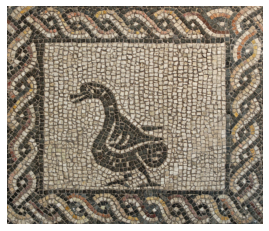

In [5]:
show_image(image_mosaic)

# ønsker å teste dette for content av bird og stil av mosaic

### Funksjon som tar bilde1, bilde2 antall iterasjoner, alfa og beta

In [6]:
def get_style_op(encoder, layer_weight):
    return loss.GramLoss(encoder, score_weight=layer_weight)

def bilde_merging(content_bilde, style_bilde, content_weight, style_weight, num_steps):
    multi_layer_encoder = enc.vgg19_multi_layer_encoder()
    
    #Innholds-bilde
    content_layer = "relu4_2"
    content_encoder = multi_layer_encoder.extract_encoder(content_layer)
    content_weight = content_weight
    content_loss = loss.FeatureReconstructionLoss(
                 content_encoder, score_weight=content_weight)
    
    
    #stil-bilde
    style_layers = ("relu1_1","relu2_1")
    style_weight = style_weight
    style_loss = loss.MultiLayerEncodingLoss(
                multi_layer_encoder, style_layers,
                get_style_op, score_weight=style_weight,)
    
    
    #samensetter de to loss-funskjonene
    perceptual_loss = loss.PerceptualLoss(content_loss, style_loss).to(device)
    
    
    content_image = content_bilde
    style_image = style_bilde
    
    perceptual_loss.set_content_image(content_image)
    perceptual_loss.set_style_image(style_image)
    
    starting_point = "content"
    input_image = get_input_image(starting_point, content_image=content_image)
    show_image(input_image, title="Input image")
    
    #optimasering
    output_image = optim.image_optimization(input_image, perceptual_loss, num_steps=num_steps)
    
    merged_bilde = output_image
    
    return merged_bilde

In [7]:
import matplotlib.pyplot as plt
def save_merged_image(merged_bilde, content_bilde, style_bilde,
                      content_weight, style_weight, num_steps):
    
    return

# Jonas sitt forslag

In [8]:
from pystiche.image import read_image
size = 500
device = get_device()
